## Proyecto Ciencia de Datos en Python Fabián Hernández 18003299

Importo paquetes necesarios para el proyecto

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [105]:
# Cargo datos usando la funcion load de numpy 
data = np.load('proyecto_training_data.npy')
mascara = np.random.rand(len(data)) <= 0.8
data_training = data[mascara]
data_test = data[~mascara]

Obtengo datos de cada columna del dataset

In [227]:
sale_price = data_training[:,0]
OverallQual = data_training[:,1]
stFLsf = data_training[:,2]
TotalRmsAbvGrd = data_training[:,3]
YearBuilt = data_training[:,4]
LotFrontage = data_training[:,5]
newLotFrontage = LotFrontage[~np.isnan(LotFrontage)]

sale_price_test = data_test[:,0]
OverallQual_test = data_test[:,1]
stFLsf_test = data_test[:,2]



3. Obtengo media, maximo, minimo, rango y desviacion estandar de cada dato 

In [107]:
list_mean = [np.mean(sale_price),np.mean(OverallQual),np.mean(stFLsf),np.mean(TotalRmsAbvGrd),np.mean(YearBuilt),np.nanmean(newLotFrontage)]
list_max = [np.max(sale_price),np.max(OverallQual),np.max(stFLsf),np.max(TotalRmsAbvGrd),np.max(YearBuilt),np.nanmax(newLotFrontage)]
list_min = [np.min(sale_price),np.min(OverallQual),np.min(stFLsf),np.min(TotalRmsAbvGrd),np.min(YearBuilt),np.nanmin(newLotFrontage)]
list_range = [np.ptp(sale_price),np.ptp(OverallQual),np.ptp(stFLsf),np.ptp(TotalRmsAbvGrd),np.ptp(YearBuilt),np.ptp(newLotFrontage)]
list_std = [np.std(sale_price),np.std(OverallQual),np.std(stFLsf),np.std(TotalRmsAbvGrd),np.std(YearBuilt),np.nanstd(newLotFrontage)]
list_campos = ["Property's sale price in dollars","Overall material and finish quality","First Floor square feet","Total rooms above grade","Original construction date","Linear feet of street connected to property"]
for x in range(0,6):
    print(f"Para el campo {list_campos[x]} la media es de: {list_mean[x]}, el valor maximo es de {list_max[x]}, el valor minimo es de {list_min[x]}, el rango es de {list_range[x]}, la desviacion estandar es de: {list_std[x]}\n")


 

Para el campo Property's sale price in dollars la media es de: 181037.86896551723, el valor maximo es de 755000.0, el valor minimo es de 34900.0, el rango es de 720100.0, la desviacion estandar es de: 79599.11755917945

Para el campo Overall material and finish quality la media es de: 6.104310344827586, el valor maximo es de 10.0, el valor minimo es de 1.0, el rango es de 9.0, la desviacion estandar es de: 1.3722553950352425

Para el campo First Floor square feet la media es de: 1158.8077586206896, el valor maximo es de 4692.0, el valor minimo es de 372.0, el rango es de 4320.0, la desviacion estandar es de: 379.32178148021114

Para el campo Total rooms above grade la media es de: 6.537931034482758, el valor maximo es de 14.0, el valor minimo es de 3.0, el rango es de 11.0, la desviacion estandar es de: 1.6279697093478436

Para el campo Original construction date la media es de: 1971.1336206896551, el valor maximo es de 2010.0, el valor minimo es de 1872.0, el rango es de 138.0, la des

4. Para cada variable en el dataset usar seaborn(función distplot para graficar un histograma de la variable)

[Text(0.5, 1.0, "Property's sale price in dollars")]

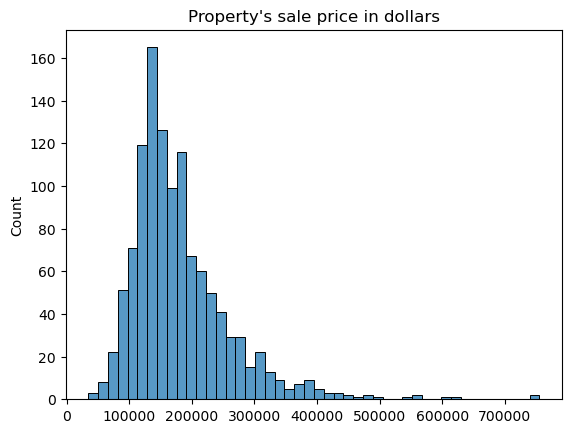

In [108]:
sns.histplot(data=sale_price).set(title="Property's sale price in dollars")


[Text(0.5, 1.0, 'Overall material and finish quality')]

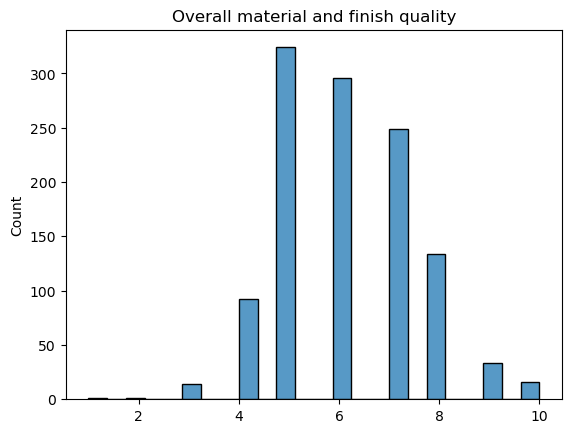

In [109]:
sns.histplot(data=OverallQual).set(title='Overall material and finish quality')

[Text(0.5, 1.0, 'First Floor square feet')]

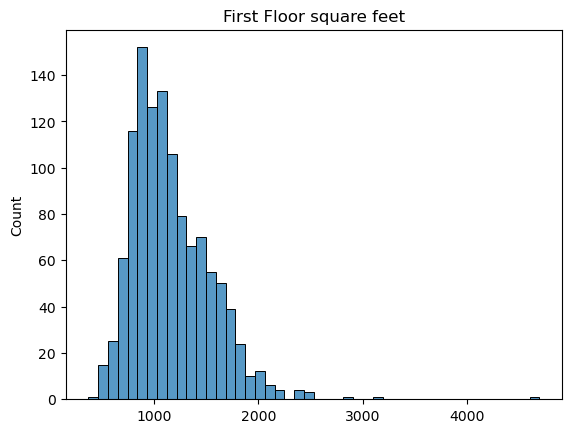

In [110]:
sns.histplot(data=stFLsf).set(title='First Floor square feet')

[Text(0.5, 1.0, 'Total rooms above grade')]

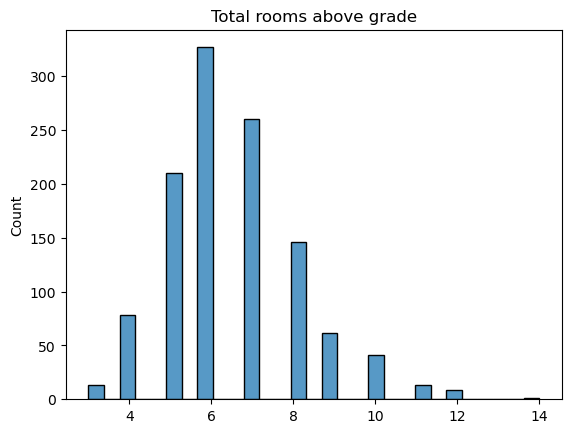

In [111]:
sns.histplot(data=TotalRmsAbvGrd).set(title='Total rooms above grade')

[Text(0.5, 1.0, 'Original construction date')]

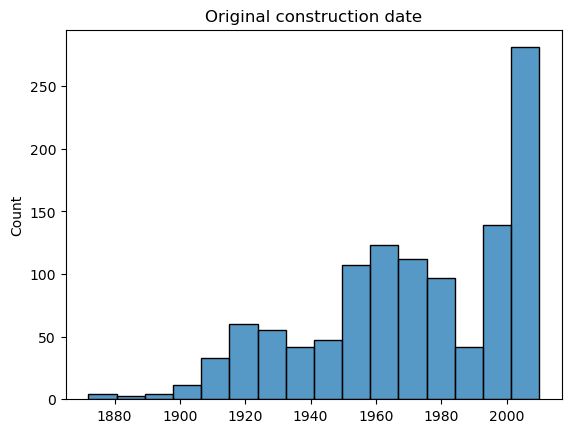

In [112]:
sns.histplot(data=YearBuilt).set(title='Original construction date')

[Text(0.5, 1.0, 'Linear feet of street connected to property')]

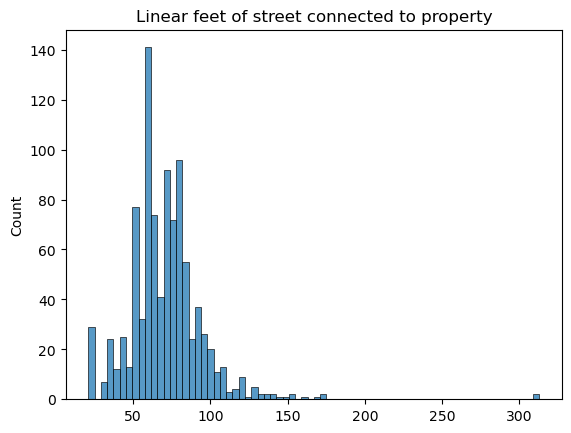

In [113]:
sns.histplot(data=newLotFrontage).set(title='Linear feet of street connected to property')

5. Para cada variable independiente x :
- Calcular el coeficiente de correlación entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
- Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
    con más potencial predictivo es decir las 2 variables que presentan mayor correlación
    entre dicha variable y la variable dependiente

### Calculamos coeficiente de correlacion

In [114]:
#Convierto a un dataframe de pandas dado que en numpy no da un unico coeficiente de correlacion 
df = pd.DataFrame(data_training,columns=['Sale Price','OverallQual','1stFlrSF','TotalRmsAbvGrd','YearBuilt','LotFrontage'])
print(df)

      Sale Price  OverallQual  1stFlrSF  TotalRmsAbvGrd  YearBuilt  \
0       208500.0          7.0     856.0             8.0     2003.0   
1       223500.0          7.0     920.0             6.0     2001.0   
2       140000.0          7.0     961.0             7.0     1915.0   
3       250000.0          8.0    1145.0             9.0     2000.0   
4       143000.0          5.0     796.0             5.0     1993.0   
...          ...          ...       ...             ...        ...   
1155    175000.0          6.0     953.0             7.0     1999.0   
1156    210000.0          6.0    2073.0             7.0     1978.0   
1157    266500.0          7.0    1188.0             9.0     1941.0   
1158    142125.0          5.0    1078.0             5.0     1950.0   
1159    147500.0          5.0    1256.0             6.0     1965.0   

      LotFrontage  
0            65.0  
1            68.0  
2            60.0  
3            84.0  
4            85.0  
...           ...  
1155         62.0  

In [115]:
corr1 = df['Sale Price'].corr(df['OverallQual'])    # Coeficiente de Correlacion SalePrice vs OverallQual
corr2 = df['Sale Price'].corr(df['1stFlrSF'])       # Coeficiente de Correlacion SalePrice vs 1stFlrSF
corr3 = df['Sale Price'].corr(df['YearBuilt'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr4 = df['Sale Price'].corr(df['LotFrontage'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr5 = df['Sale Price'].corr(df['TotalRmsAbvGrd'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
print(f"El coeficiente de correlacion entre Sale Price y OverallQual es de: {corr1}")
print(f"El coeficiente de correlacion entre Sale Price y First Floor square feet es de: {corr2}")
print(f"El coeficiente de correlacion entre Sale Price y Year Built es de: {corr3}")
print(f"El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: {corr4}")
print(f"El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: {corr5}")


El coeficiente de correlacion entre Sale Price y OverallQual es de: 0.7929657277768689
El coeficiente de correlacion entre Sale Price y First Floor square feet es de: 0.5856869705217036
El coeficiente de correlacion entre Sale Price y Year Built es de: 0.5204457084168211
El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: 0.3299955484830409
El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: 0.5312703695739828


### Graficar x vs y(scatterplot) usando matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

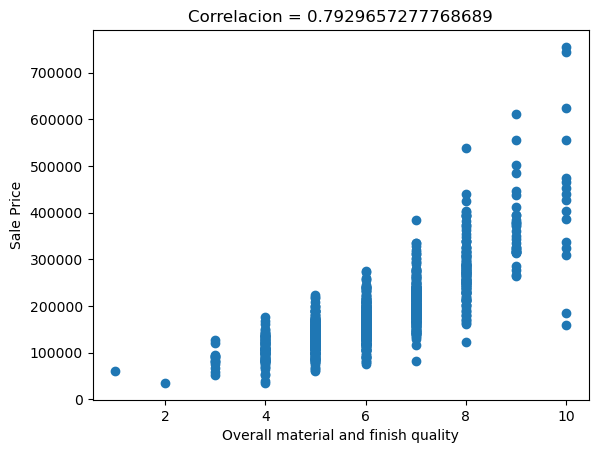

In [116]:
plt.scatter(OverallQual,sale_price)
plt.title(f"Correlacion = {corr1}")
plt.xlabel("Overall material and finish quality")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

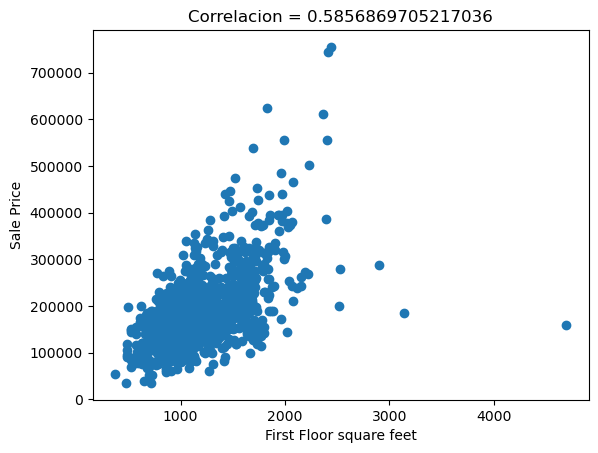

In [117]:
plt.scatter(stFLsf,sale_price)
plt.title(f"Correlacion = {corr2}")
plt.xlabel("First Floor square feet")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

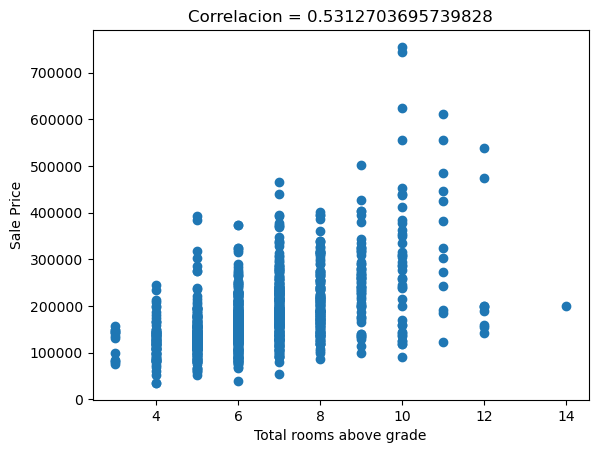

In [118]:
plt.scatter(TotalRmsAbvGrd,sale_price)
plt.title(f"Correlacion = {corr5}")
plt.xlabel("Total rooms above grade")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

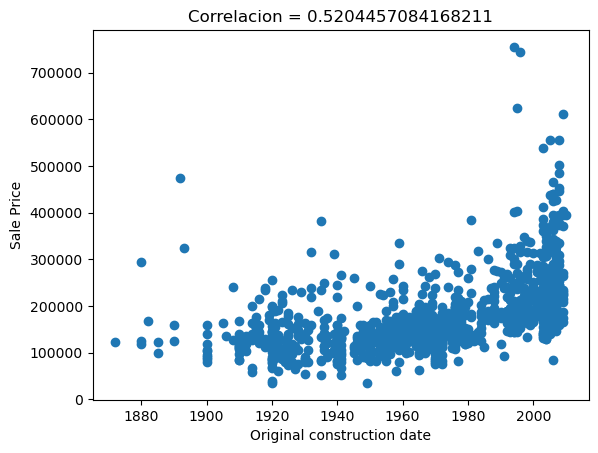

In [119]:
plt.scatter(YearBuilt,sale_price)
plt.title(f"Correlacion = {corr3}")
plt.xlabel("Original construction date")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

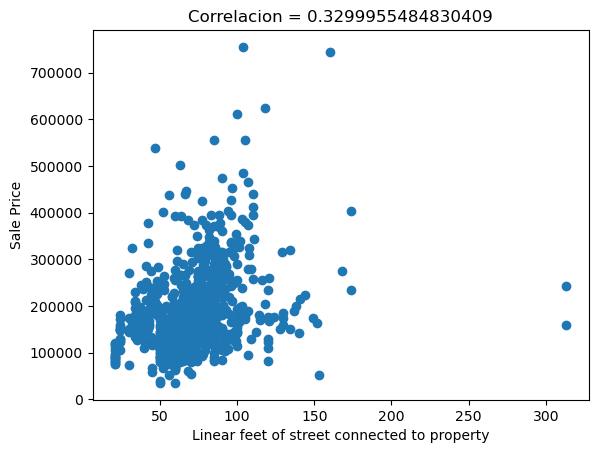

In [120]:
plt.scatter(LotFrontage,sale_price)
plt.title(f"Correlacion = {corr4}")
plt.xlabel("Linear feet of street connected to property")
plt.ylabel("Sale Price")
plt.show

#### Dado las graficas anteriores junto con el coeficiente de correlacion las dos variables con mas potencial predictivo para la variable Sale Price son OverallQual(Overall material and finish quality) y First Floor square feet por lo que los modelos se implementaran en base a estas dos variables 

## Se empieza a trabajar con programacion orientada a objetos

In [229]:
class Modelo:
    def __init__(self,varx,vary,epochs,print_error_every, learning_rate):
        self.varx = varx
        self.vary = vary
        self.epochs = epochs
        self.varaux_x = varx
        self.print_error_every = print_error_every
        self.learning_rate = learning_rate
        self.b1 = 0.1
        self.b0 = 0.2
        self.betas = np.array([self.b1,self.b0])
        vect1 = np.ones_like(self.varx).reshape(-1,1)
        self.varx = np.reshape(self.varx,(-1,1))
        self.A = np.hstack([self.varx,vect1])  
        self.dic_modelos = {}
        self.dic_errores = {}
        self.error = 0
   
    def iter_for_betas(self): #Funcion para encontrar modelo optimo
        for iter in range(self.epochs):
            yEstimada = np.dot(self.A,self.betas) 
            self.error = np.mean(1/2*np.power(yEstimada-self.vary,2)) # Calculo error

            deltas = np.mean(np.multiply(self.A,(yEstimada-self.vary).reshape((-1,1))),axis=0)
            deltas = self.learning_rate*deltas
            self.betas[0] = self.betas[0] - deltas[0]
            self.betas[1] = self.betas[1] - deltas[1]
            #Almacenamos modelo resultante junto con error en cada iteracion, cada uno en su diccionario por separado 
            self.dic_modelos[iter] = [self.betas[0],self.betas[1]]
            self.dic_errores[iter] = self.error
            
            #Instruccion 6.4
            if(iter%self.print_error_every == 0):
                print(f"El error es de: {self.error} para la iteracion: {iter}")
                
    def obtain_last_error(self):
        return self.error
    
    def obtain_last_betas(self):
        return self.betas
    
    def obtain_dict_betas(self):
        return self.dic_modelos
    
    def obtain_dict_errores(self):
        return self.dic_errores
    
    def graph_error_time(self):
        lista_iteraciones1 = list(self.dic_errores.keys())
        lista_error1 = list(self.dic_errores.values())

        plt.plot(lista_iteraciones1,lista_error1)
        plt.ylabel('Error')
        plt.xlabel('Iteraciones')
        plt.title("Error en el transcurso de iteraciones")
        plt.show()

    def graph_models_time(self,n):
        plt.scatter(self.varaux_x,self.vary)
        for i in range(0,self.epochs+1,n):
            plt.plot(self.varaux_x,self.varaux_x*self.dic_modelos[i][0]+self.dic_modelos[i][1])
            
        plt.grid()
        plt.show

    def graph_best_model(self):
         plt.scatter(self.varaux_x,self.vary)
         plt.plot(self.varaux_x, self.varaux_x*self.betas[0]+self.betas[1])
         plt.grid()
         plt.show

    def model_scikit(self):
        model = LinearRegression().fit(self.varaux_x.reshape(-1,1),self.vary)
        return model
    
    def graph_scikit(self,modelo):
         plt.scatter(self.varaux_x,self.vary)
         plt.plot(self.varaux_x, self.varaux_x*modelo.coef_+modelo.intercept_)
         plt.grid()
         plt.show

    def calculate_prediction(self,manual_model,scikit_model):
        manual = lambda x : x*manual_model[0] + manual_model[1]
        manual = manual(self.varaux_x)
        scitk_model = scikit_model.predict(self.varaux_x.reshape(-1,1))
        average_model = np.mean(np.array([manual,scitk_model]),axis=0)
        plt.scatter(self.varaux_x,average_model)
        plt.title("Modelo Promedio Manual,Scikit Learn")
        plt.show()
        return {1: manual,2:scitk_model,3:average_model}

    def validate_20_percent(self,manual_model,scikit_model,data_testx,data_testy):
        manual = lambda x : x*manual_model[0] + manual_model[1]
        manual = manual(data_testx)
        error_manual = np.mean(1/2*np.power(data_testy-manual,2)) # Calculo error
        scitk_model = scikit_model.predict(data_testx.reshape(-1,1))
        error_scikit = np.mean(1/2*np.power(data_testy-scitk_model,2)) # Calculo error
        errores = {'Modelo Manual':error_manual,'Modelo con Scikit Learn':error_scikit}
        modelos = list(errores.keys())
        valores = list(errores.values())
        plt.bar(modelos,valores)
        plt.ylabel("Error")
        plt.title("Errores Modelos ")
        plt.show()

### Se realiza ciclo para obtener error y betas

In [230]:
Modelo1 = Modelo(OverallQual,sale_price,100001,1000,0.01)
Modelo2 = Modelo(stFLsf,sale_price,261,1,0.00000001)

In [231]:
Modelo1.iter_for_betas()

El error es de: 19555209377.928413 para la iteracion: 0
El error es de: 1278403879.9632308 para la iteracion: 1000
El error es de: 1216013167.9375396 para la iteracion: 2000
El error es de: 1191628085.1784427 para la iteracion: 3000
El error es de: 1182097303.402412 para la iteracion: 4000
El error es de: 1178372247.3031693 para la iteracion: 5000
El error es de: 1176916328.6525707 para la iteracion: 6000
El error es de: 1176347290.4795372 para la iteracion: 7000
El error es de: 1176124884.8923597 para la iteracion: 8000
El error es de: 1176037958.8344042 para la iteracion: 9000
El error es de: 1176003984.2402968 para la iteracion: 10000
El error es de: 1175990705.4482763 para la iteracion: 11000
El error es de: 1175985515.5020187 para la iteracion: 12000
El error es de: 1175983487.0387282 para la iteracion: 13000
El error es de: 1175982694.2244842 para la iteracion: 14000
El error es de: 1175982384.357192 para la iteracion: 15000
El error es de: 1175982263.2471857 para la iteracion: 1

In [232]:
Modelo2.iter_for_betas()

El error es de: 19532588793.953594 para la iteracion: 0
El error es de: 19019671349.5948 para la iteracion: 1
El error es de: 18521891839.209133 para la iteracion: 2
El error es de: 18038803491.006012 para la iteracion: 3
El error es de: 17569972718.946167 para la iteracion: 4
El error es de: 17114978733.5854 para la iteracion: 5
El error es de: 16673413164.403637 para la iteracion: 6
El error es de: 16244879693.28034 para la iteracion: 7
El error es de: 15828993698.787333 para la iteracion: 8
El error es de: 15425381910.979664 para la iteracion: 9
El error es de: 15033682076.374908 para la iteracion: 10
El error es de: 14653542632.819912 para la iteracion: 11
El error es de: 14284622393.95342 para la iteracion: 12
El error es de: 13926590242.981266 para la iteracion: 13
El error es de: 13579124835.489262 para la iteracion: 14
El error es de: 13241914311.02712 para la iteracion: 15
El error es de: 12914656013.20451 para la iteracion: 16
El error es de: 12597056218.048 para la iteracion

In [233]:
beta1 = Modelo1.obtain_last_betas()
beta1

array([ 45996.8110995 , -99740.94085825])

In [234]:
beta2 = Modelo2.obtain_last_betas()
beta2

array([149.93652809,   0.32654254])

## Comenzamos proceso de graficación

#### Grafico error Modelo 1

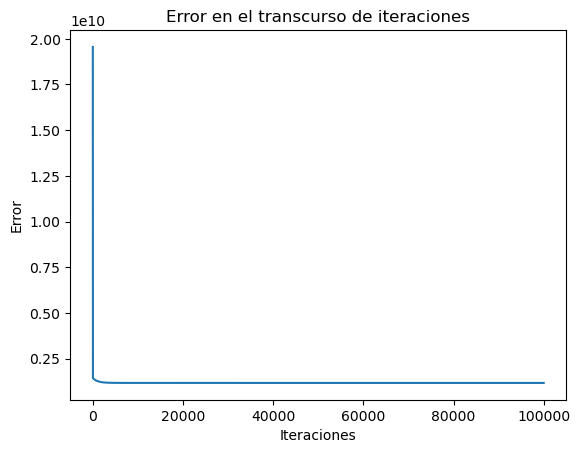

In [235]:
Modelo1.graph_error_time()

#### Grafico error Modelo 2

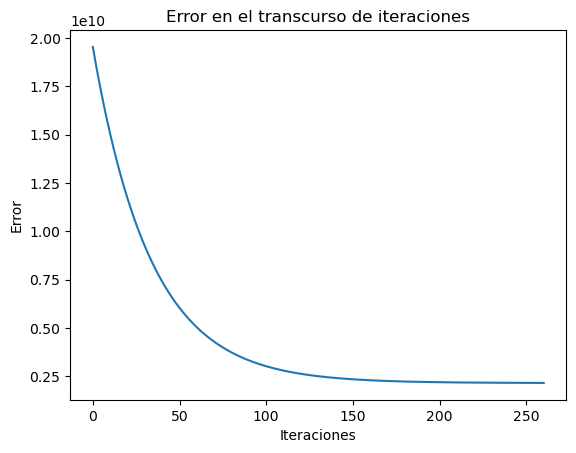

In [236]:
Modelo2.graph_error_time()

##### Grafico los distintos modelos para OverallQual: Overall material and finish quality

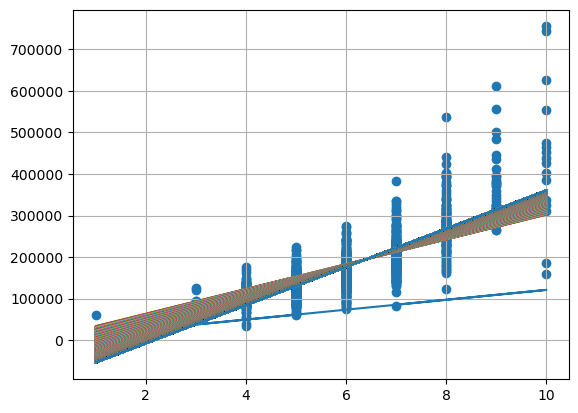

In [237]:
Modelo1.graph_models_time(20)

##### Grafico los distintos modelos para 1stFlrSF: First Floor square feet

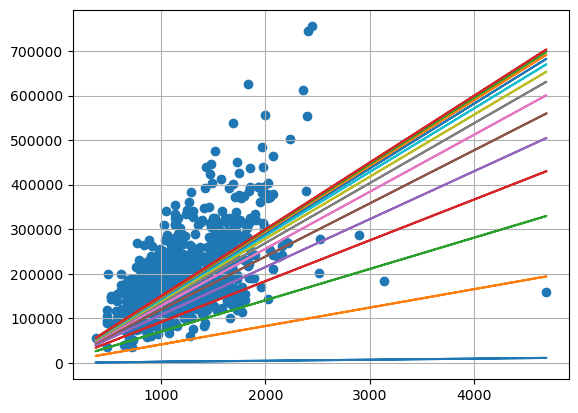

In [238]:
Modelo2.graph_models_time(20)

##### Grafico modelo optimo para OverallQual: Overall material and finish quality

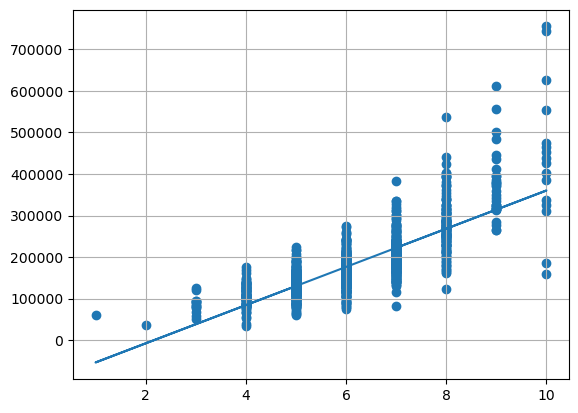

In [239]:
Modelo1.graph_best_model()

##### Graficamos modelo optimo para 1stFlrSF: First Floor square feet

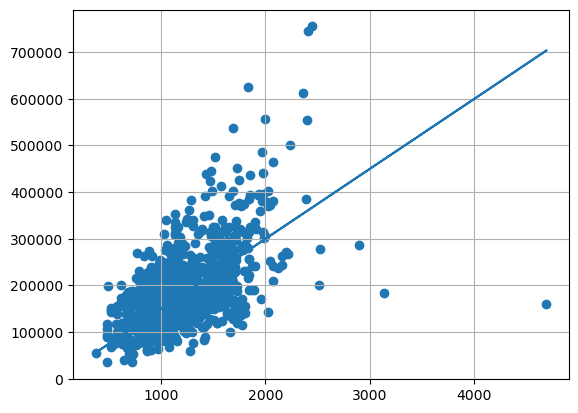

In [240]:
Modelo2.graph_best_model()

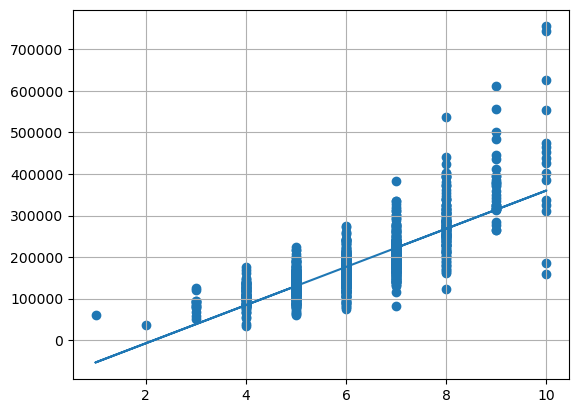

In [241]:
mode = Modelo1.model_scikit()
# Graficamos modelo1 Scikit Learn
Modelo1.graph_scikit(mode)

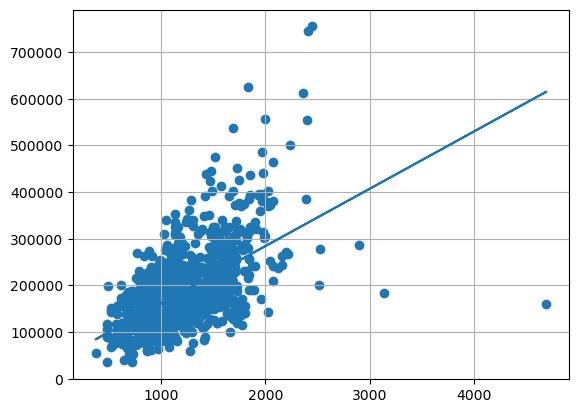

In [242]:
mode2 = Modelo2.model_scikit()
#Graficamos modelo 2 usando scikit_learn
Modelo2.graph_scikit(mode2)

##### La funcion calculate preduction recibe el modelo manual y el modelo hecho en scikit learn y devuelve un diccionario con los 3 modelos 
- Manual
- Scikit
- Promedio

#### Modelo OverallQual vs SalePrice

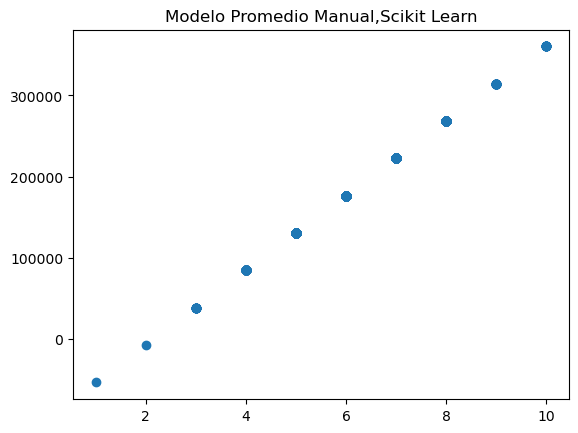

Modelo manual: [222236.73683826 222236.73683826 222236.73683826 ... 222236.73683826
 130243.11463926 130243.11463926], Modelo hecho con Scikit Learn [222236.73683826 222236.73683826 222236.73683826 ... 222236.73683826
 130243.11463925 130243.11463925], Modelo Promedio: [222236.73683826 222236.73683826 222236.73683826 ... 222236.73683826
 130243.11463926 130243.11463926]


In [243]:
estimacion = Modelo1.calculate_prediction(beta1,mode)

print(f"Modelo manual: {estimacion[1]}, Modelo hecho con Scikit Learn {estimacion[2]}, Modelo Promedio: {estimacion[3]}")

#### Modelo First Floor square feet vs Sale Price

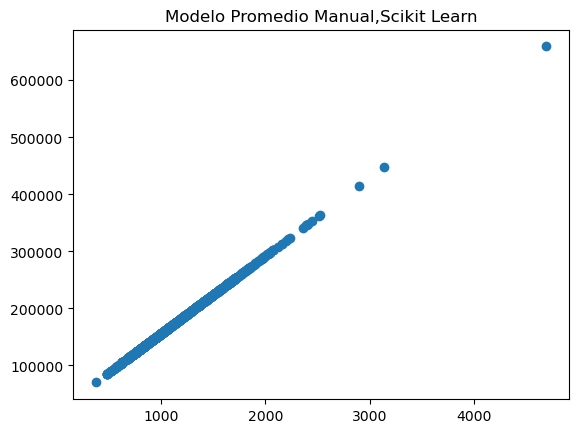

Modelo manual: [128345.99458397 137941.93238146 144089.33003297 ... 178124.92190845
 161631.90381901 188320.60581828], Modelo hecho con Scikit Learn [143821.58277235 151687.43907409 156726.50326739 ... 184625.71233763
 171106.27181901 192983.18465823], Modelo Promedio: [136083.78867816 144814.68572777 150407.91665018 ... 181375.31712304
 166369.08781901 190651.89523826]


In [245]:
estimacion = Modelo2.calculate_prediction(beta2,mode2)

print(f"Modelo manual: {estimacion[1]}, Modelo hecho con Scikit Learn {estimacion[2]}, Modelo Promedio: {estimacion[3]}")

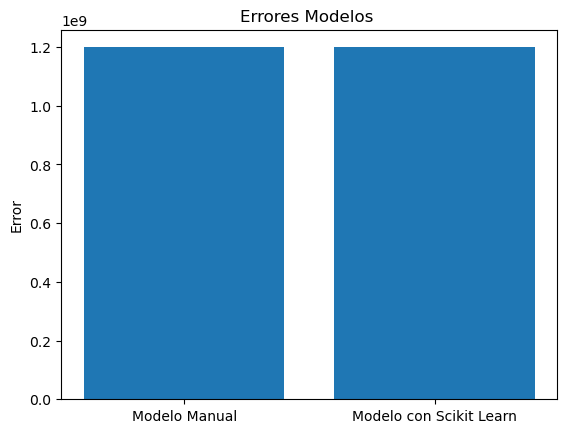

In [246]:
Modelo1.validate_20_percent(beta1,mode,OverallQual_test,sale_price_test)

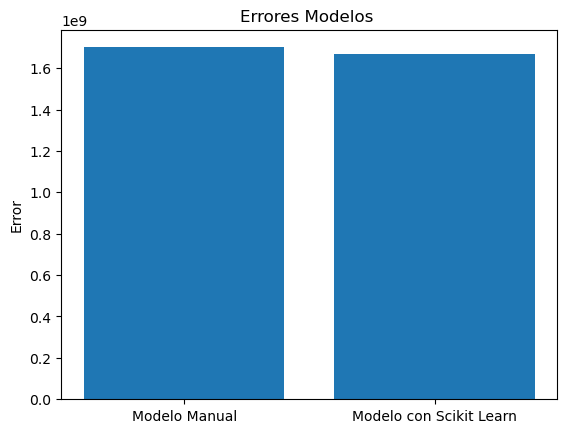

In [247]:
Modelo2.validate_20_percent(beta2,mode2,stFLsf_test,sale_price_test)